In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../TextFiles/smsspamcollection.tsv",sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
len(df)

5572

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

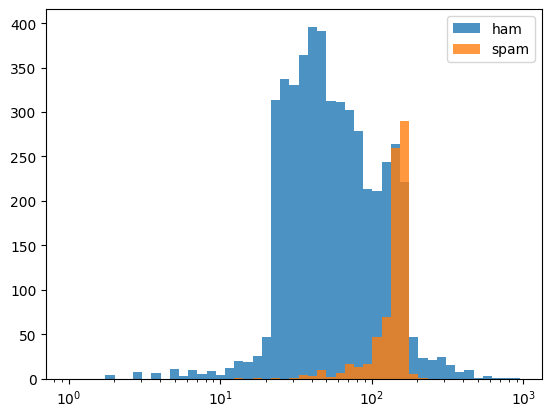

In [8]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

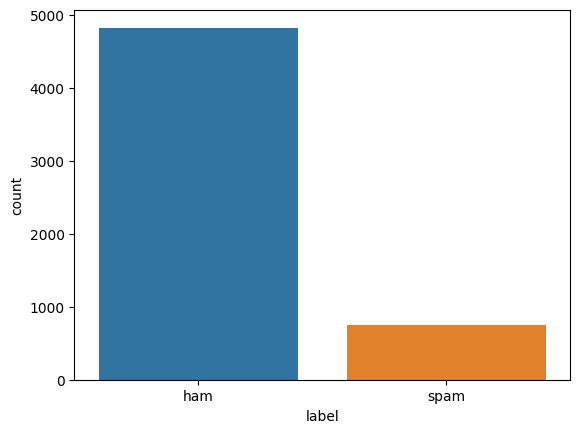

In [9]:
sns.countplot(x='label',data = df)

In [10]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

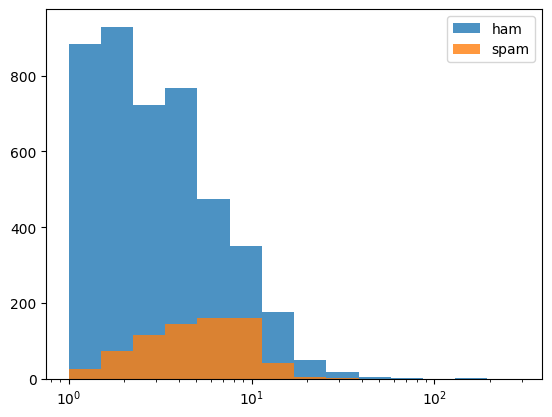

In [11]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

# Model creation

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X= df[['length','punct']]
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape

(3900, 2)

In [17]:
X_test.shape

(1672, 2)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
# Metrics
from sklearn import metrics

In [22]:
pred = lr.predict(X_test)

In [23]:
pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [26]:
new = pd.DataFrame({'y_test': np.random.randint(0, 2, size=100),  # Replace with your actual test labels
                         'Pred': np.random.randint(0, 2, size=100)}) 

In [35]:
new.head()

,y_test,Pred
0,1,1
1,0,0
2,0,0
3,0,1
4,1,0


Text(0.5, 1.0, 'Comparison of Actual Labels and Predictions')

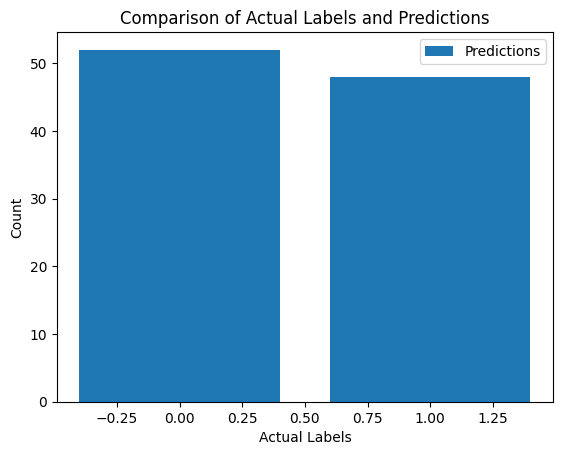

In [30]:
grouped_data = new.groupby('y_test').count()

# Create a bar plot
plt.bar(grouped_data.index, grouped_data['Pred'])

# Add labels and a legend
plt.xlabel('Actual Labels')
plt.ylabel('Count')
plt.legend(['Predictions'])

# Show the plot
plt.title('Comparison of Actual Labels and Predictions')

In [31]:
# classification metrics
print(metrics.confusion_matrix(y_test,pred))

[[1404   44]
 [ 219    5]]


In [32]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [37]:
df2 = pd.DataFrame(metrics.confusion_matrix(y_test,pred), index=['ham','spam'], columns=['ham','spam'])
df2

,ham,spam
ham,1404,44
spam,219,5


In [38]:
print(metrics.accuracy_score(y_test,pred))

0.8427033492822966


# Retraining using naïve Bayes classifier

In [39]:
from sklearn.naive_bayes import MultinomialNB  

In [40]:
nb = MultinomialNB()

In [42]:
nb.fit(X_train,y_train)
pred = nb.predict(X_test)
print(metrics.confusion_matrix(y_test,pred))

[[1438   10]
 [ 224    0]]


In [43]:
# This will produce 0 predictions on the spam 
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



# Using A SVM classifier

In [44]:
from sklearn.svm import SVC

In [45]:
svc = SVC(gamma='auto')

svc.fit(X_train,y_train)
pred = svc.predict(X_test)

print(metrics.confusion_matrix(y_test,pred))

[[1373   75]
 [ 121  103]]


In [46]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [47]:
new = pd.DataFrame({'y_test': np.random.randint(0, 2, size=100),  # Replace with your actual test labels
                         'Pred': np.random.randint(0, 2, size=100)}) 

In [ ]:
new.head()